# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

**<font color="green">Findings</font>**<br/>After reviewing the data, the data has total of 43 marketing campaigns.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
from warnings import filterwarnings 
filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import precision_recall_curve, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import time

In [150]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [151]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


<Axes: >

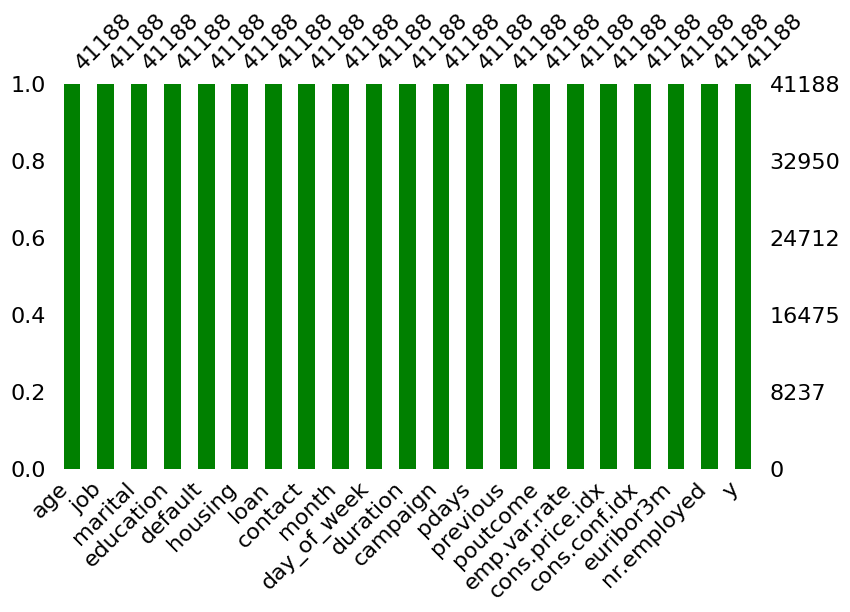

In [152]:
fig = plt.figure(figsize=(20, 5))
msno.bar(df, color="green", ax=fig.add_subplot(1,2,1))

Total duplicates removed: 12


<Axes: >

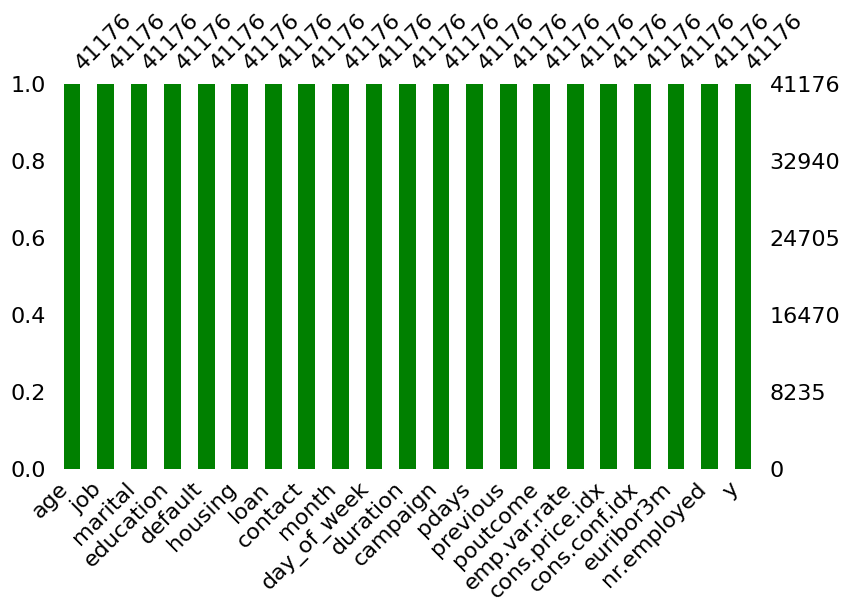

In [153]:
# remove initial duplicate rows
df_wo_dup = df.drop_duplicates()
total_reduced_rows = df.shape[0] - df_wo_dup.shape[0]
print(f"Total duplicates removed: {total_reduced_rows}")
fig = plt.figure(figsize=(20, 5))
msno.bar(df_wo_dup, color="green", ax=fig.add_subplot(1,2,1))

In [154]:
df_wo_dup.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [155]:
# Or drop rows with missing values
df_wo_dup = df_wo_dup.dropna()
df_wo_dup

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [156]:
# create a function to visualize the numerical columns
def histogram(column_name):
    sns.histplot(data=df[column_name], bins=50, kde=True)
    plt.title(column_name+' distribution')
    plt.xticks(rotation=90)
    plt.show()

# Create a box plot between a categorical column and price
def box_plot(df, column_name):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=column_name, y='y', data=df)
    plt.title(f'Box Plot: {column_name} vs. Outcome')
    plt.xlabel(column_name)
    plt.ylabel('Outcome')
    plt.xticks(rotation=45)
    plt.show()

# Get Unique Values for Categorical Columns passed as a list
def unique_values(df, categorical_columns):
    for column in categorical_columns:
        print(f"Unique Values for {column} = {df[column].unique()}")
        print(f"Total Unique Values for {column} = {df[column].nunique()}")
        print()

# Clean up the column value by keeping the first word of the column value and converting it to lower case for consistency
def clean_column_value(column_name):
    return column_name.split(" ")[0].lower()

### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [157]:
df_wo_dup.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,258.315815,2.567879,962.464810,0.173013,0.081922,93.575720,-40.502863,3.621293,5167.034870
std,10.42068,259.305321,2.770318,186.937102,0.494964,1.570883,0.578839,4.627860,1.734437,72.251364
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


**<font color="green">Findings</font>**<br/>
Based on the above finding, there are no specific outliers that we need to remove.

**Next Step**<br/>
Check all the unique values and see if we need to clean up any of them or replace it with the right values

In [129]:
unique_values = {col: df_wo_dup[col].unique() for col in df_wo_dup.columns}
unique_values

{'age': array([56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55,
        49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36,
        28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95,
        77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81,
        74, 17, 87, 91, 86, 98, 94, 84, 92, 89], dtype=int64),
 'job': array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
        'retired', 'management', 'unemployed', 'self-employed', 'unknown',
        'entrepreneur', 'student'], dtype=object),
 'marital': array(['married', 'single', 'divorced', 'unknown'], dtype=object),
 'education': array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
        'professional.course', 'unknown', 'university.degree',
        'illiterate'], dtype=object),
 'default': array(['no', 'unknown', 'yes'], dtype=object),
 'housing': array(['no', 'yes', 'unknown'], dtype=object),
 'loan': array(['no', 'yes', 'unknown'], dtype=obje

**<font color="green">Findings</font>**<br/>
Based on the above unique values, only the yes/no column is getting changed to 1/0 which will allow us to include it in the correlation matrix. The correlation matrix can provide more information on whether the target data has any corelation with any of the other features.

In [159]:
# Assuming df is your DataFrame and 'column_name' is the column you want to convert
df_wo_dup['y'] = df_wo_dup['y'].map({'yes': 1, 'no': 0})
df_wo_dup.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [160]:
# Creating a list of categorical columns and numerical columns
categorical_columns = df_wo_dup.select_dtypes(include=object).columns.tolist()
numerical_columns = df_wo_dup.select_dtypes(exclude=object).columns.tolist()
categorical_columns, numerical_columns

(['job',
  'marital',
  'education',
  'default',
  'housing',
  'loan',
  'contact',
  'month',
  'day_of_week',
  'poutcome'],
 ['age',
  'duration',
  'campaign',
  'pdays',
  'previous',
  'emp.var.rate',
  'cons.price.idx',
  'cons.conf.idx',
  'euribor3m',
  'nr.employed',
  'y'])

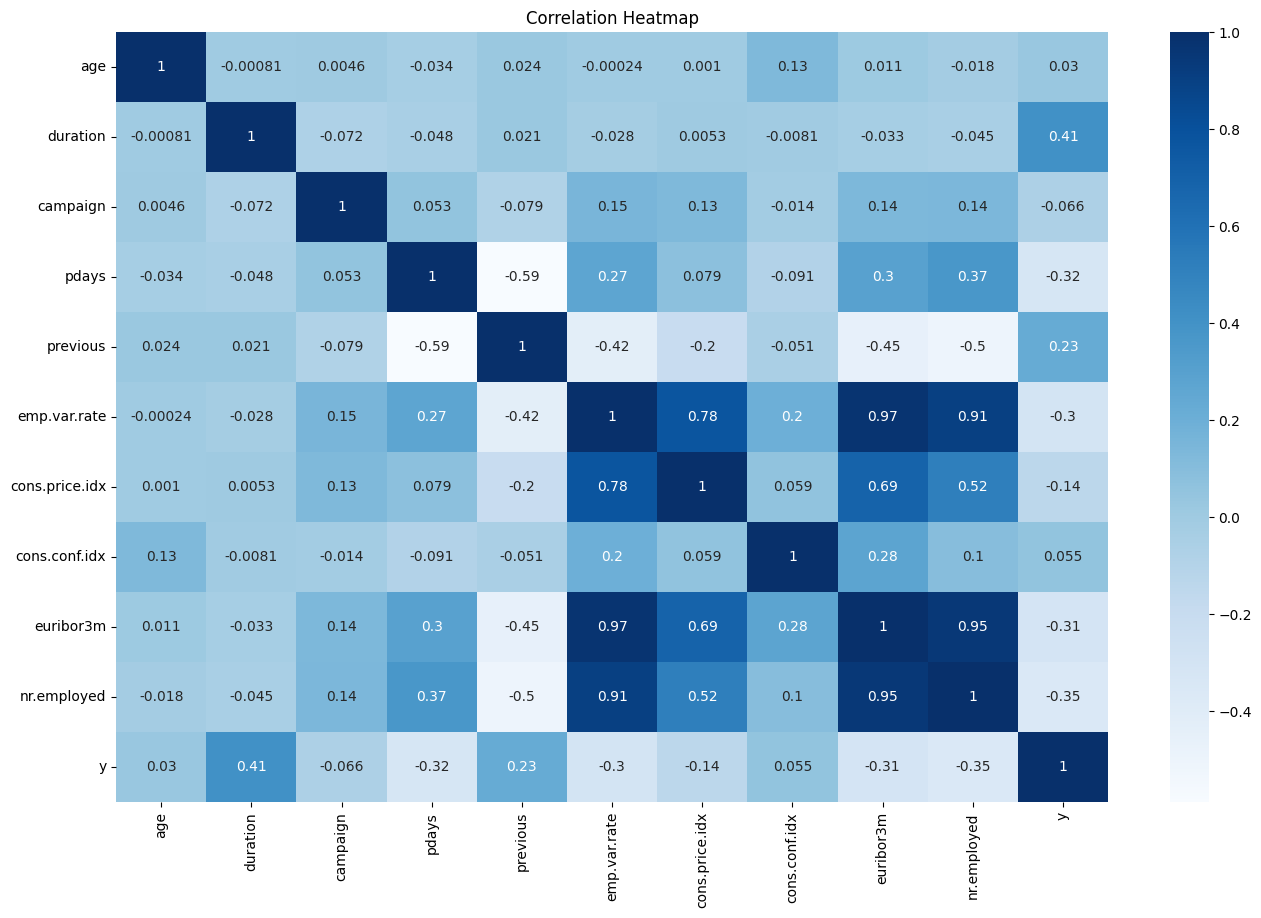

In [161]:
# By inspecting the corelation matrix, we'll be able to see which numerical columns
# have co-relation with price which is our target prediction value.
correlation_matrix = df_wo_dup[numerical_columns].corr()
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title("Correlation Heatmap")
plt.show()

**<font color="green">Findings</font>**: <br/>
Based on the correlation map, The duration and previous call can possibly be two reasons that are directly related to customer making a decsion. However, based on the data the user's employment status, Euro Rate, consumer price index and employment variable rate could be impacting that decision. 

**Next Steps**<br/>
Now, we'll check all the columns to see how the data is distributed and if we see any outliers in it

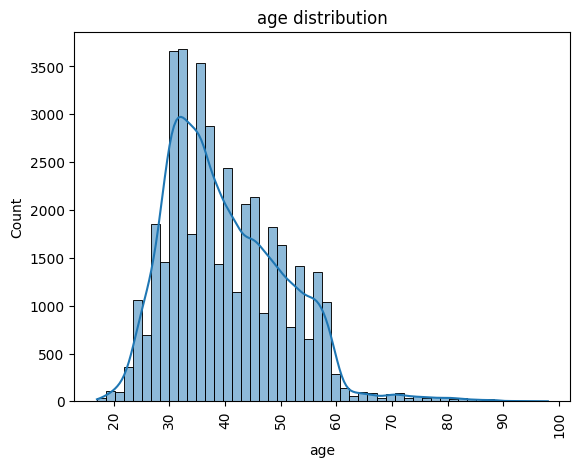

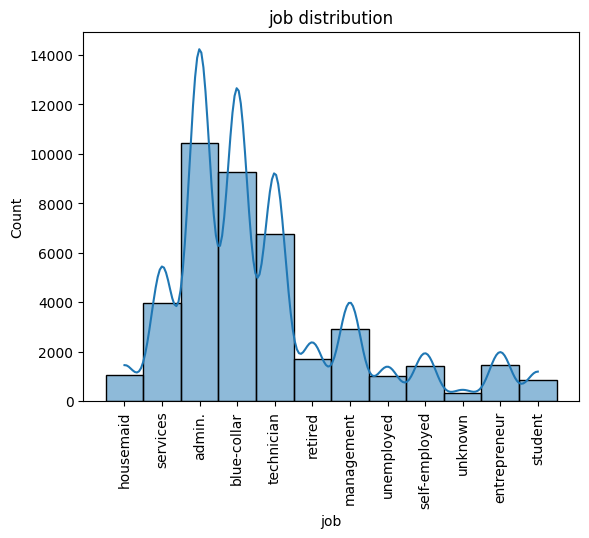

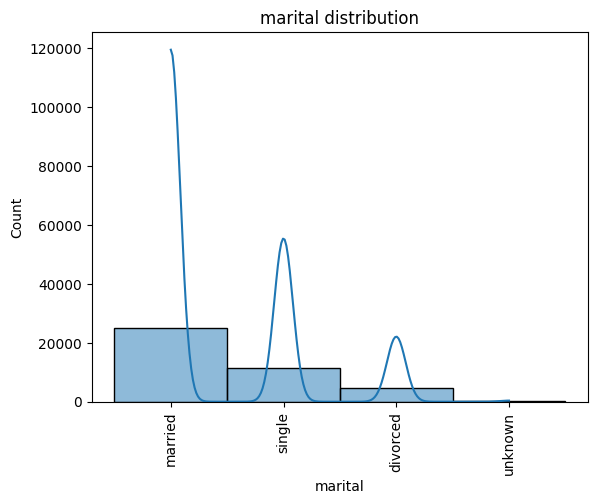

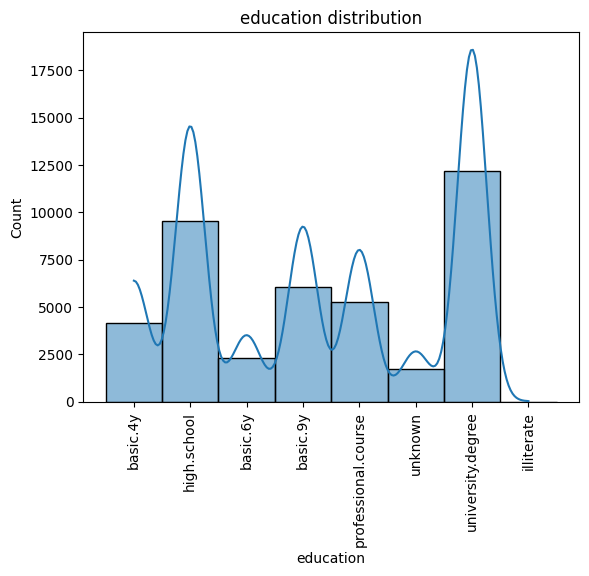

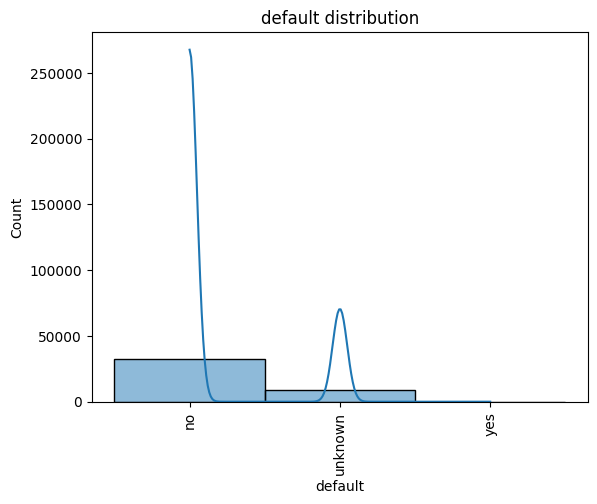

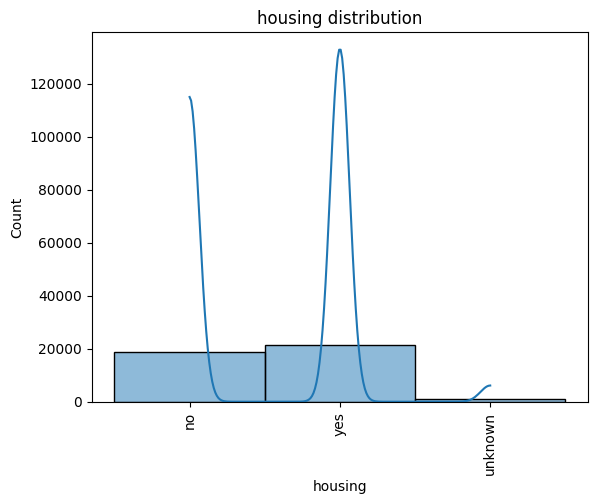

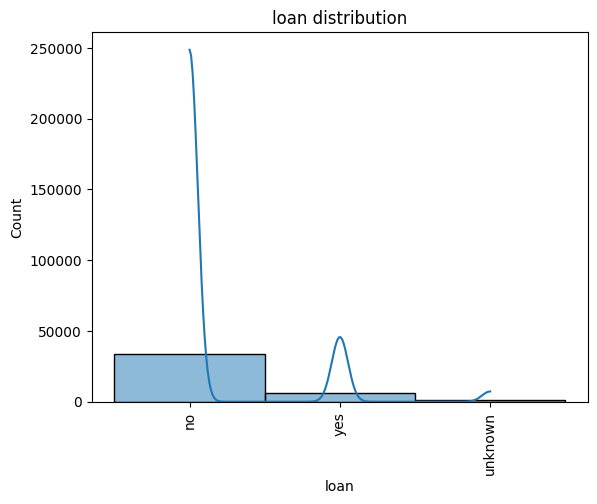

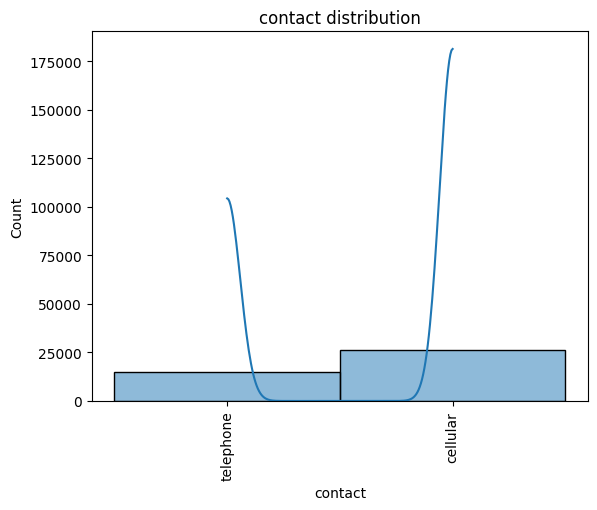

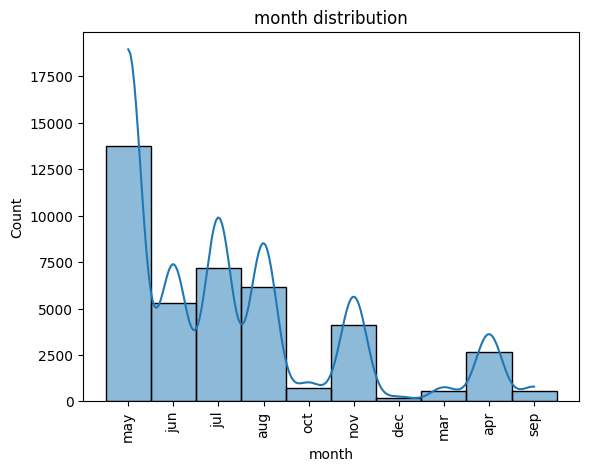

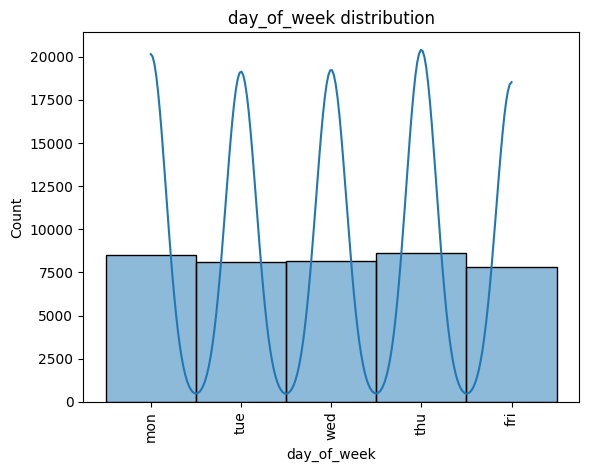

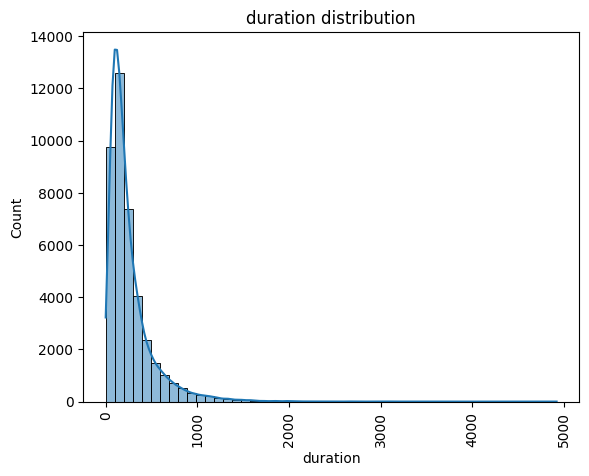

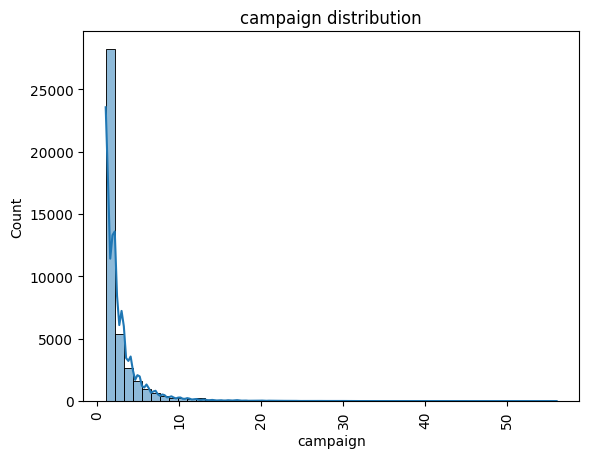

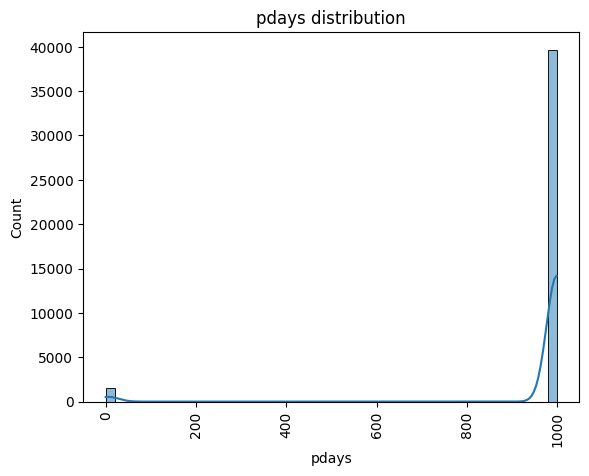

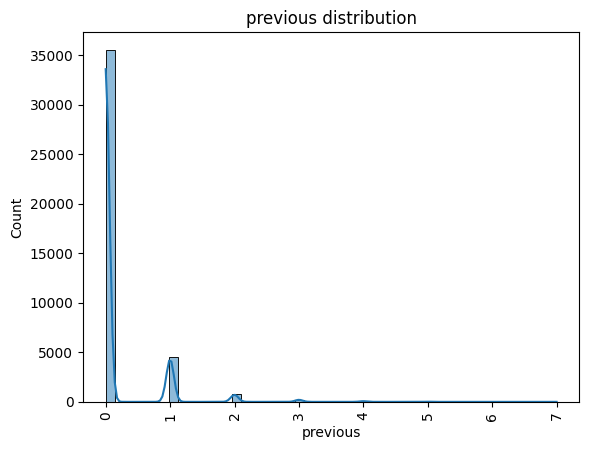

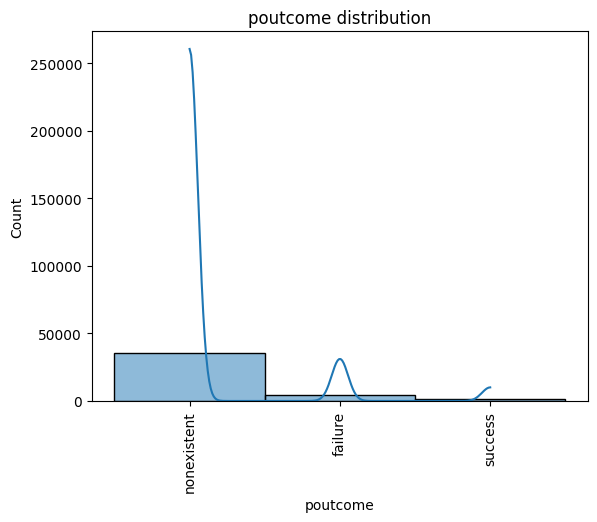

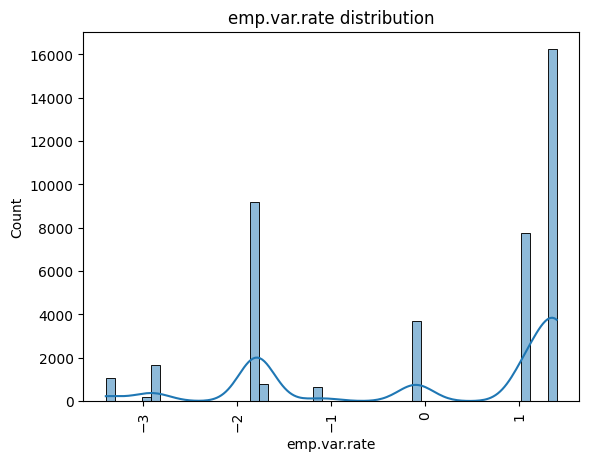

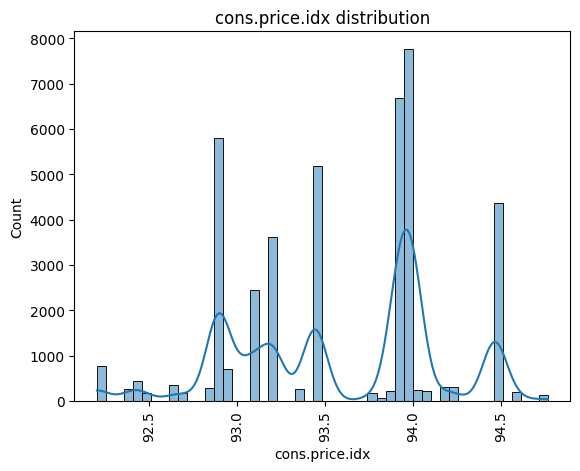

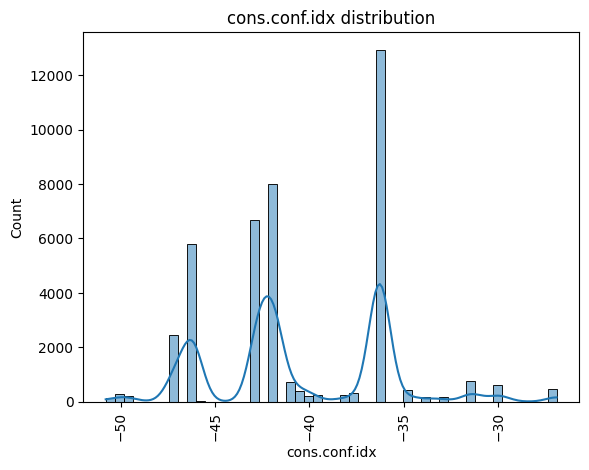

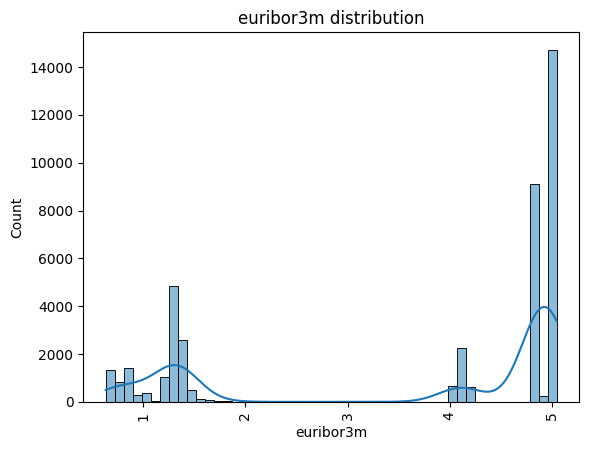

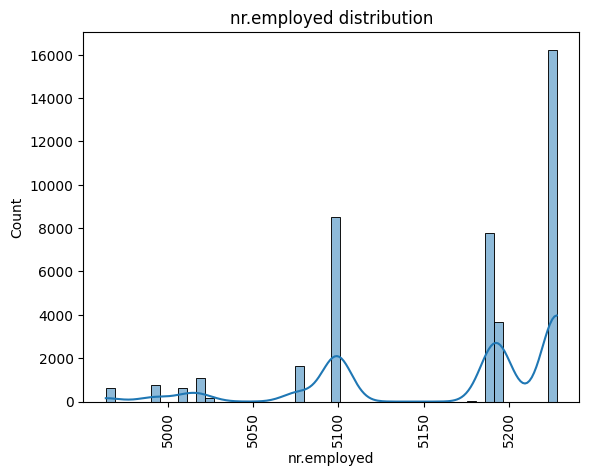

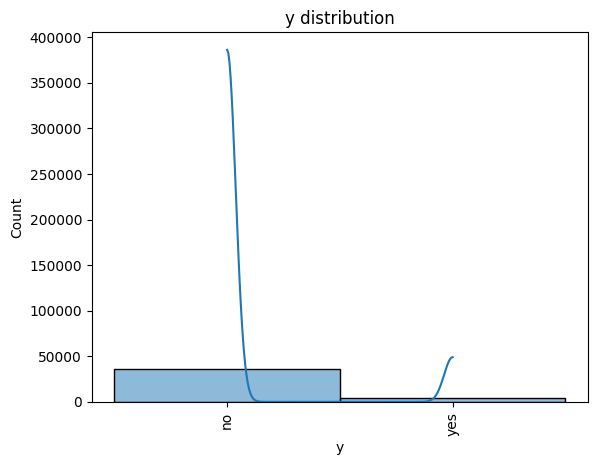

In [162]:
# Plot histograms of all columns to see the distribution of each value  in the column
for column in df_wo_dup.columns:
    histogram(column)  # Calling the histogram function defined above

**<font color="green">Findings</font>**<br/>
Based on the above plots, the data is distributed for most columns except for duration, campaign, pdays and previous. We are going to keep this records intact for now until further analysis.

**Next Step**<br/>
We will now review the relationship of the outcome y to all the categorical columns

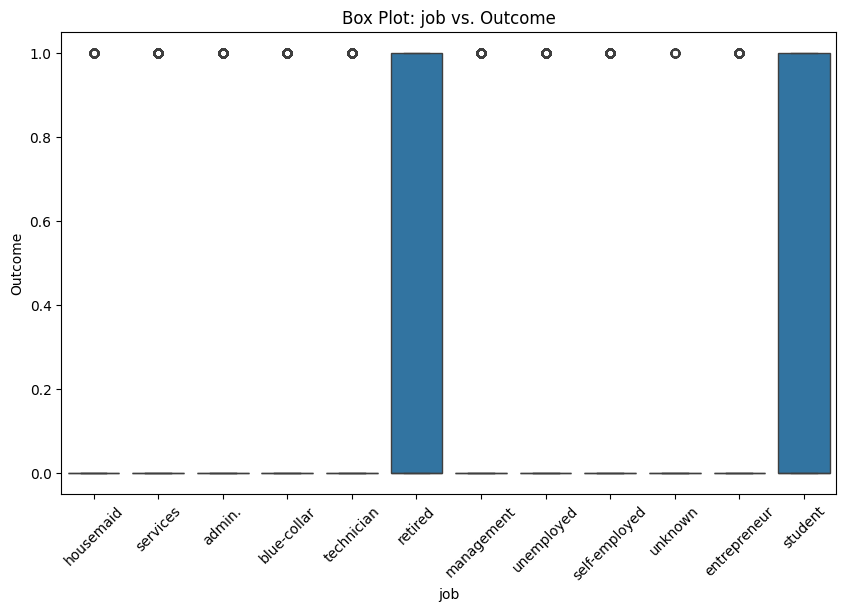

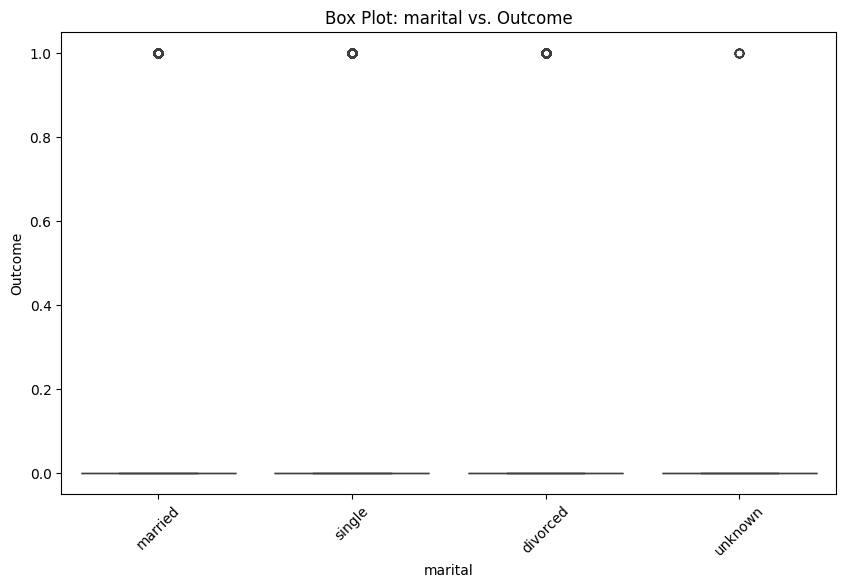

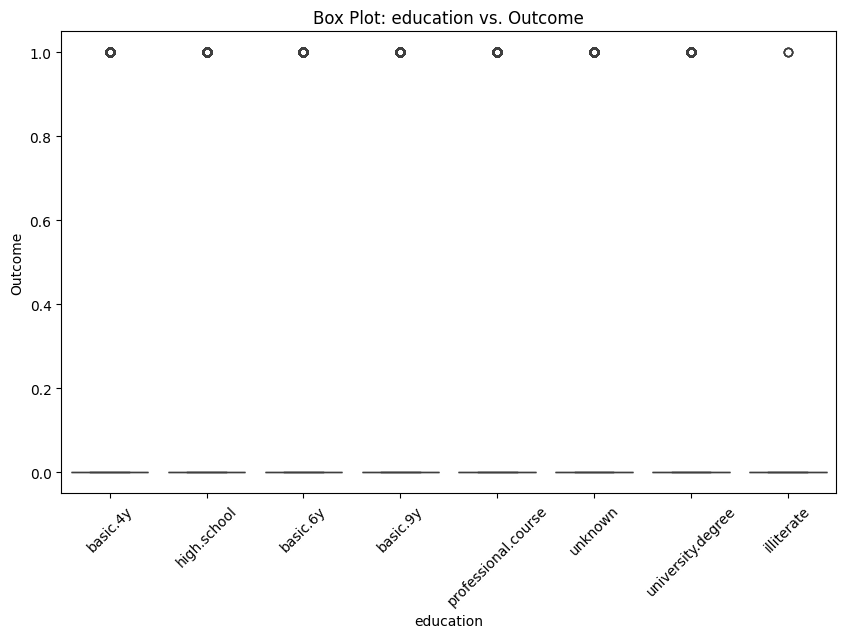

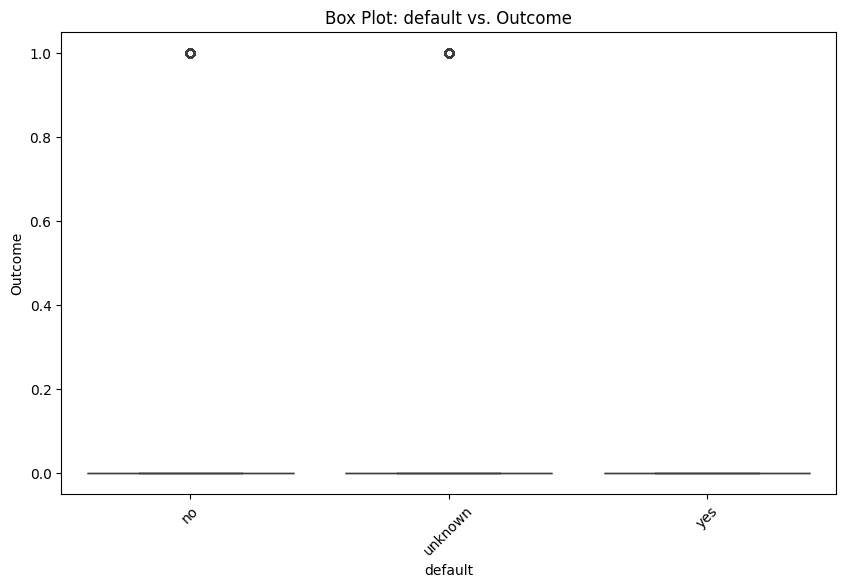

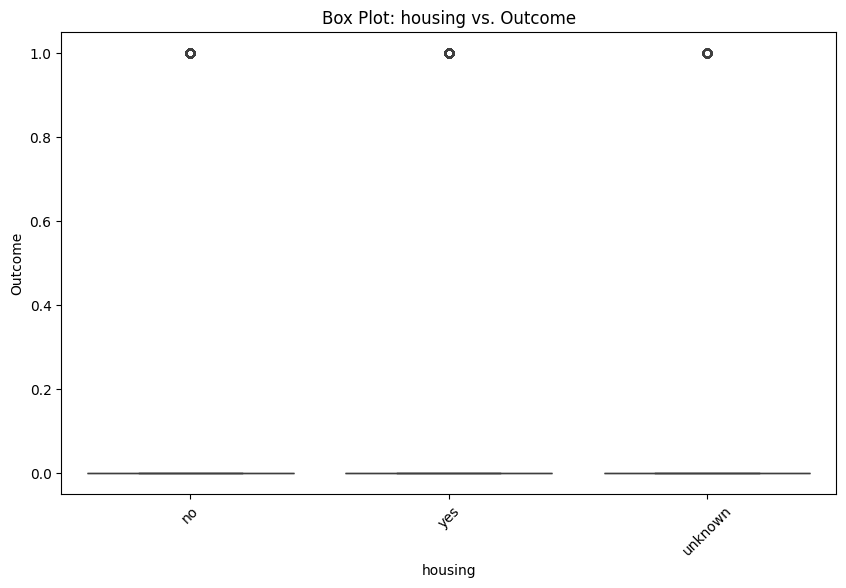

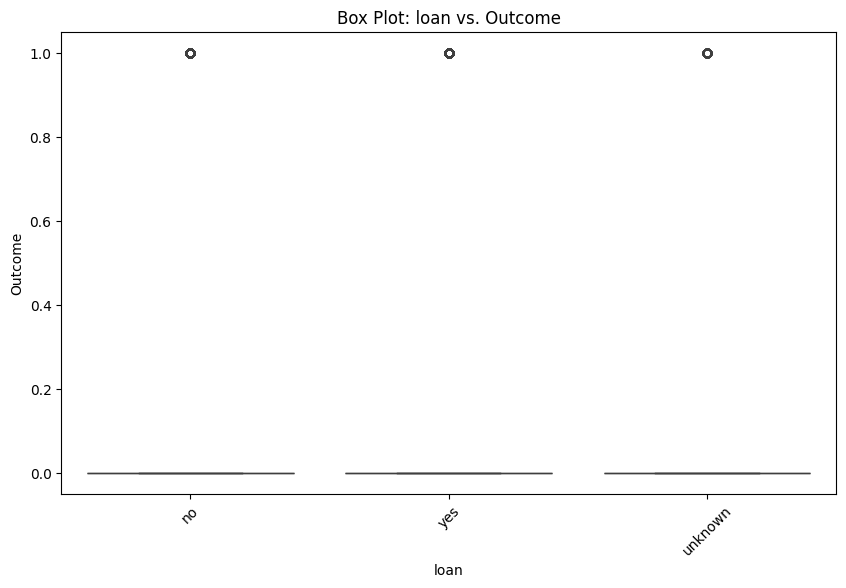

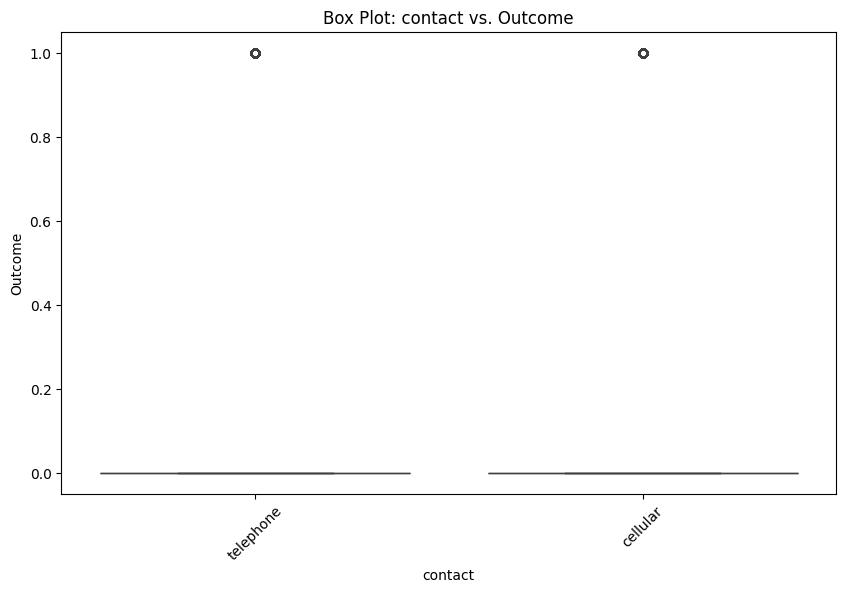

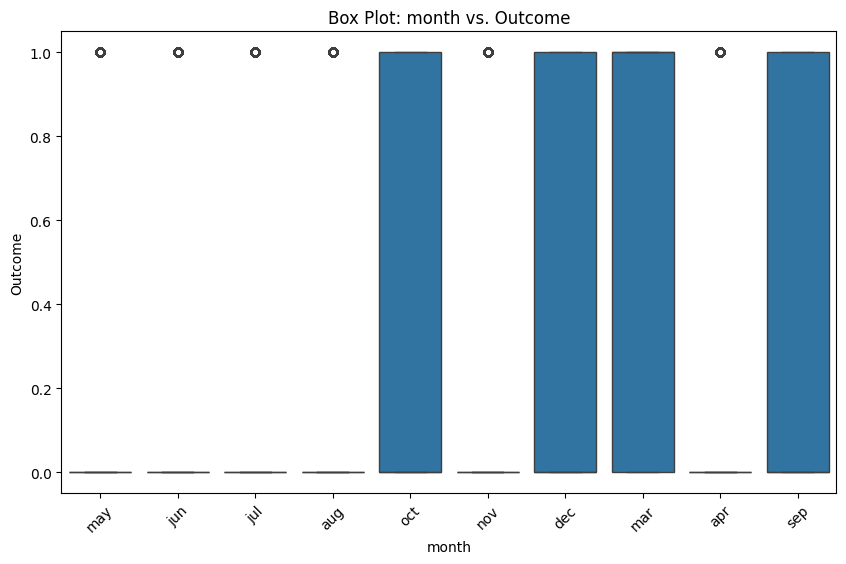

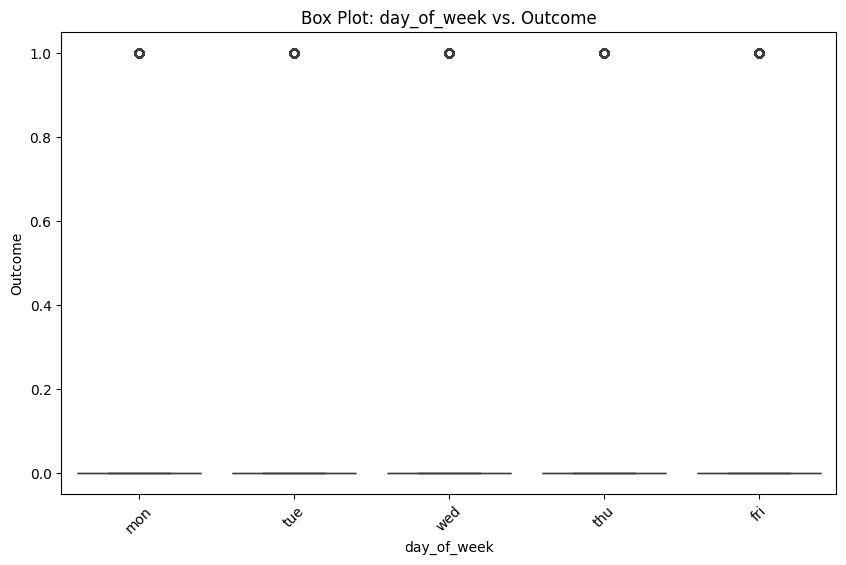

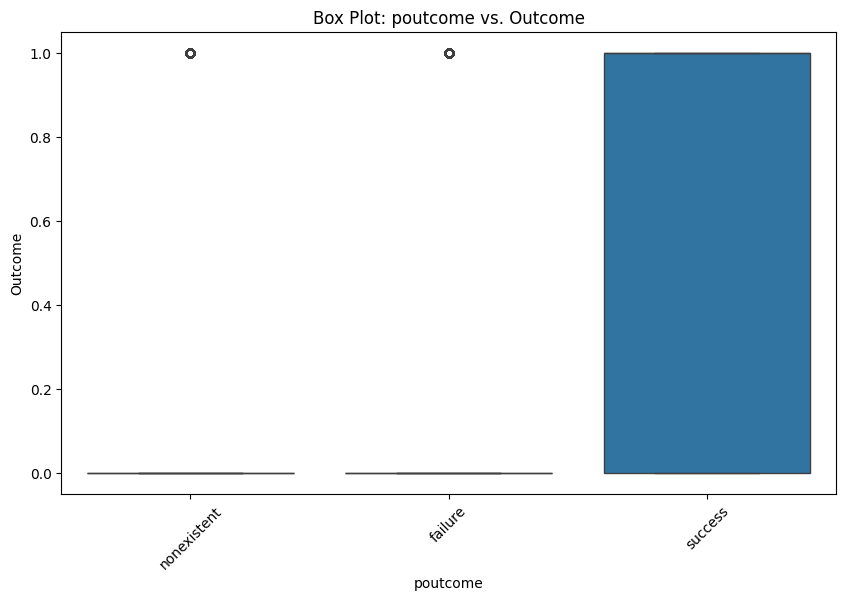

In [134]:
for column in categorical_columns:
    box_plot(df_wo_dup, column)

**<font color="green">Findings</font>**<br/>
Based on the Box plots, only Job, Month and POutcome are the only three categorical features that have direct relationship with Outcome of user subscribing to bank's cd.

**Next Steps**<br/>
We are now going to remove any of the categorical columns from the dataset which doesn't have any impact on the outcome y

In [163]:
#Removing columns which are not required for the model
df_clean = df_wo_dup.drop(['duration', 'contact', 'day_of_week', 'pdays', 'previous'], axis=1)

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [164]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   month           41176 non-null  object 
 8   campaign        41176 non-null  int64  
 9   poutcome        41176 non-null  object 
 10  emp.var.rate    41176 non-null  float64
 11  cons.price.idx  41176 non-null  float64
 12  cons.conf.idx   41176 non-null  float64
 13  euribor3m       41176 non-null  float64
 14  nr.employed     41176 non-null  float64
 15  y               41176 non-null  int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 5.3+ MB


**<font color="green">Business Objective</font>**: <br/>The main business objective is to review the data and predict what criteria will lead to customer opting for subscribing to a bank deposit with the bank. This determination can help the bank focus on those customers to increase the success rate for the people opting for term deposit with the bank.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [165]:
#Label Encoding all columns with less than 15 unique values
#Initialize LabelEncoder
from sklearn.calibration import LabelEncoder


le = LabelEncoder()

# Select columns with 10 or less unique values
columns_to_encode = [col for col in df_clean.columns if df_clean[col].nunique() <= 15 and df_clean[col].dtype == 'object']

# Apply LabelEncoder to these columns
for column in columns_to_encode:
    df_clean[column] = le.fit_transform(df_clean[column])
    
df_clean.head(10)

,age,job,marital,education,default,housing,loan,month,campaign,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,6,1,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,6,1,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,6,1,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,6,1,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,6,1,1,1.1,93.994,-36.4,4.857,5191.0,0
5,45,7,1,2,1,0,0,6,1,1,1.1,93.994,-36.4,4.857,5191.0,0
6,59,0,1,5,0,0,0,6,1,1,1.1,93.994,-36.4,4.857,5191.0,0
7,41,1,1,7,1,0,0,6,1,1,1.1,93.994,-36.4,4.857,5191.0,0
8,24,9,2,5,0,2,0,6,1,1,1.1,93.994,-36.4,4.857,5191.0,0
9,25,7,2,3,0,2,0,6,1,1,1.1,93.994,-36.4,4.857,5191.0,0


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [166]:
# Define X and y
X = df_clean.drop('y', axis=1).values
y = df_clean['y'].values


In [167]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [168]:
# Standardize the features
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [169]:
baseline_performance = 0.8

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [170]:
lr = LogisticRegression().fit(X_train_std, y_train)

### Problem 9: Score the Model

What is the accuracy of your model?

In [172]:
y_pred = lr.predict(X_test_std)
y_score = lr.predict_proba(X_test_std)[:,1]
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')
if accuracy > baseline_performance:
    print("Model's accuracy is better than the baseline performance.")
else:
    print("Model's accuracy is not better than the baseline performance.")

Accuracy: 89.32%
Model's accuracy is better than the baseline performance.


**<font color="green">Findings</font>**<br/>
Based on the initial model performance for LogisticRegression, the accuracy of the model was 89.32% which was better than the baseline performance set for 80%.

### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [173]:
# Model Array with all the models defined
models = [
    ('Logistic Regression', LogisticRegression()),
    ('KNN', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('SVM', SVC(probability=True))
]

Logistic Regression:


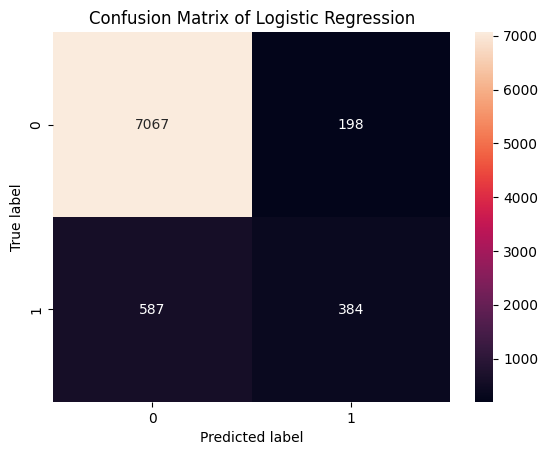

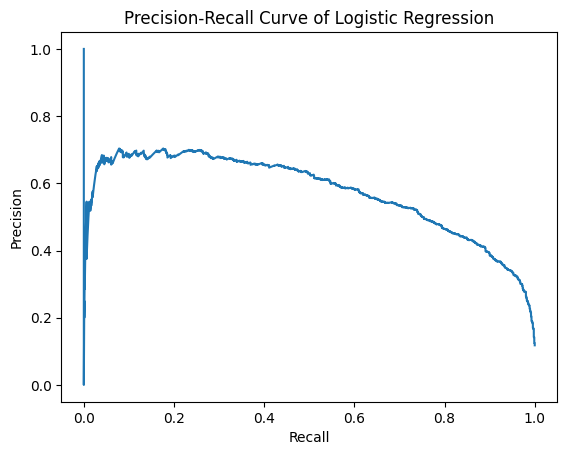

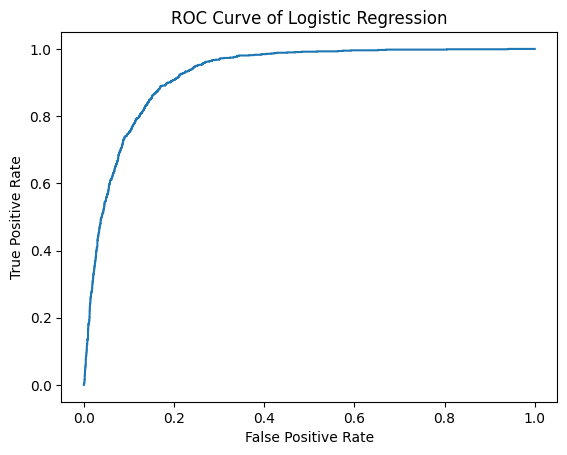

KNN:


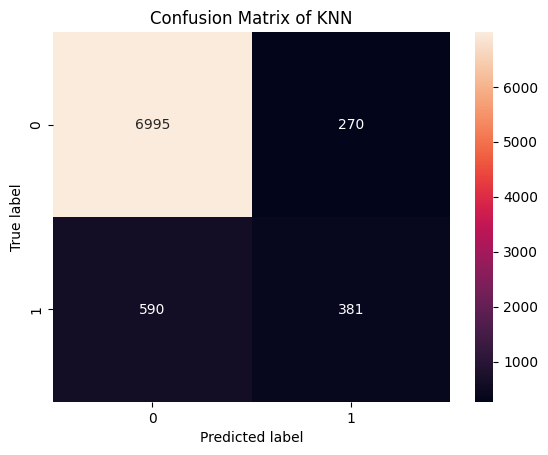

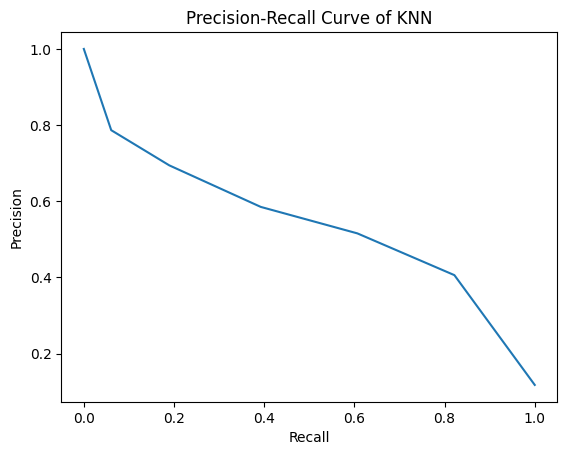

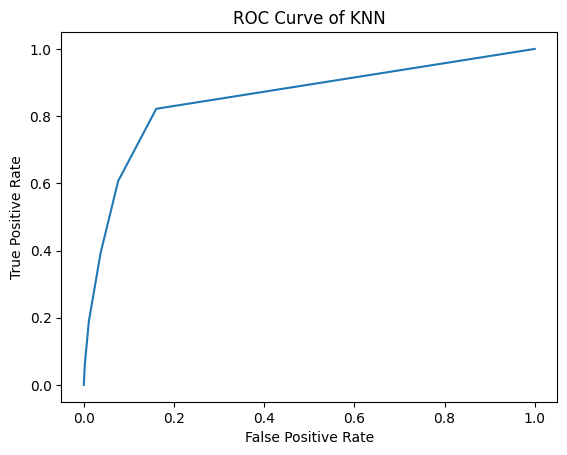

Decision Tree:


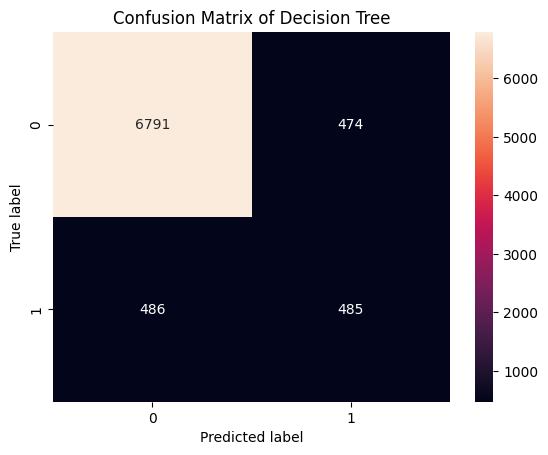

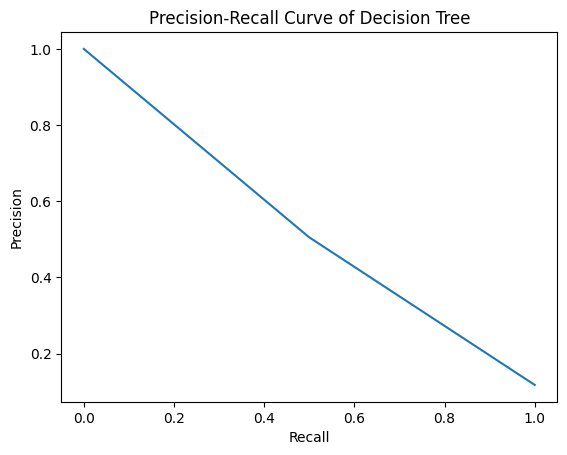

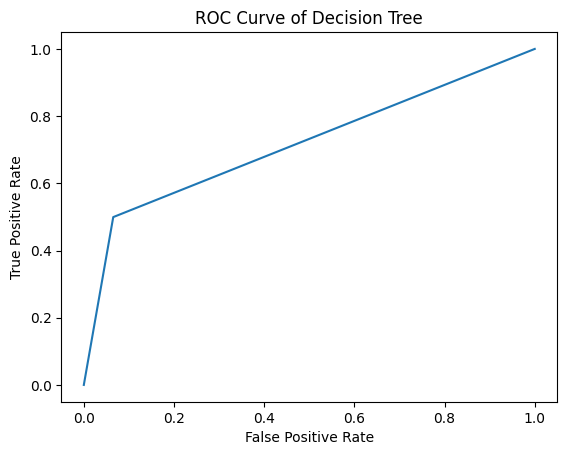

SVM:


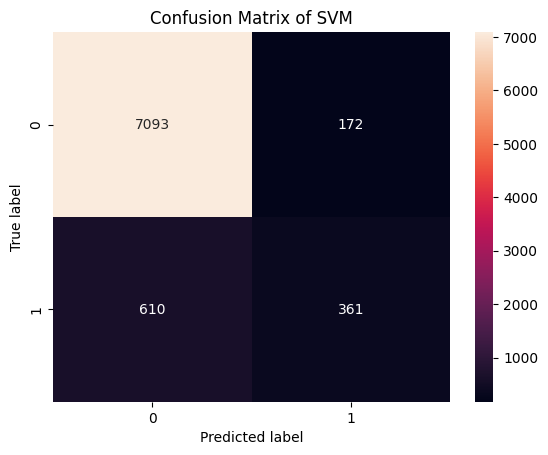

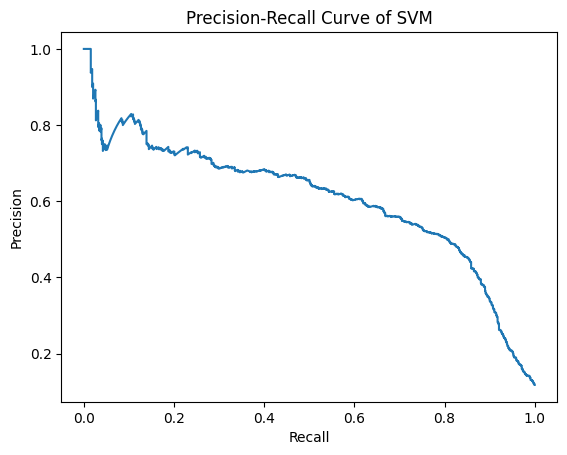

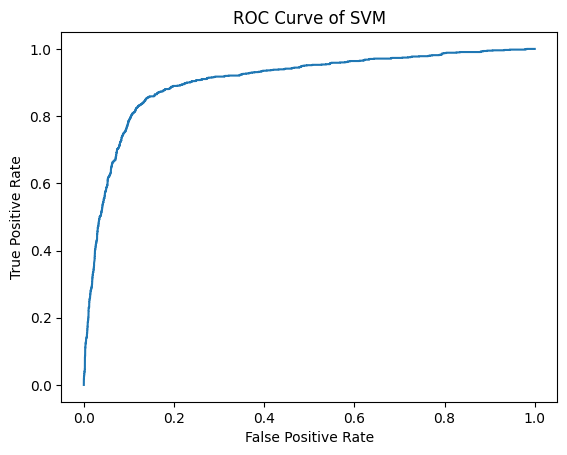

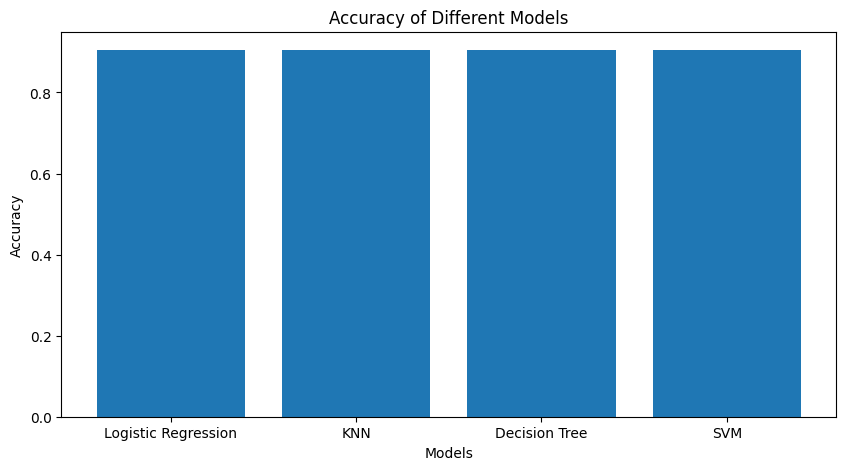

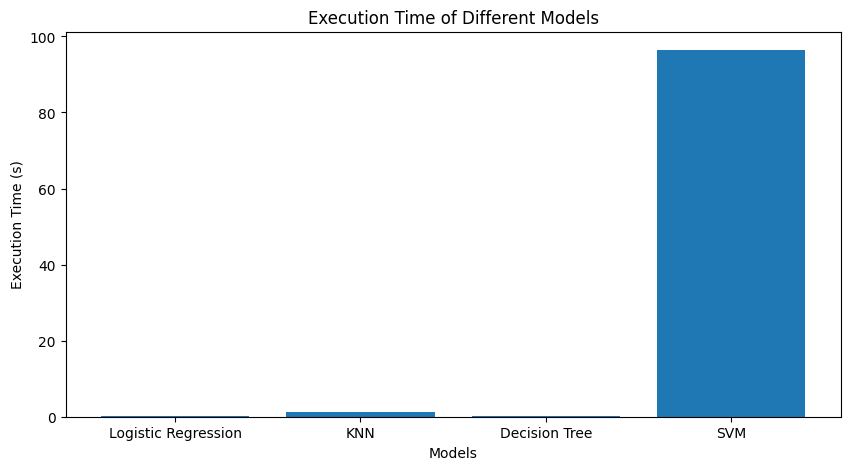

,Model,Train Time,Train Accuracy,Test Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Logistic Regression,0.184549,0.912386,0.904687,0.791551,0.684107,0.720955,0.684107
1,KNN,1.283232,0.926806,0.895580,0.753734,0.677607,0.705939,0.677607
2,Decision Tree,0.262966,1.000000,0.883439,0.719475,0.717120,0.718287,0.717120
3,SVM,96.417101,0.920795,0.905051,0.799054,0.674053,0.713904,0.674053


In [144]:
# Looping through all the models for baseline performance without hyperparameter tuning
model_names = []
accuracies = []
execution_times = []
results = pd.DataFrame(columns=['Model', 'Train Time', 'Train Accuracy', 'Test Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'])
index = 0
# Train each model, make predictions and evaluate
for name, model in models:
    start_time = time.time()
    model.fit(X_train_std, y_train)
    y_pred = model.predict(X_test_std)
    y_score = model.predict_proba(X_test_std)[:,1]
    train_accuracy = accuracy_score(y_train, model.predict(X_train_std))
    test_accuracy = accuracy_score(y_test, y_pred)
    end_time = time.time()
    execution_time = end_time - start_time

    precision = precision_score(y_test, y_pred, average="macro")
    recall = recall_score(y_test, y_pred, average="macro")
    f1score = f1_score(y_test, y_pred, average="macro")
    rocauc = roc_auc_score(y_test, y_pred)

    results.loc[index] = [name, execution_time, train_accuracy, test_accuracy, precision, recall, f1score, rocauc]
    
    # Increment the index
    index += 1

    print(f'{name}:')
    
    # Plot Confusion Matrix
    plt.figure()  
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title(f'Confusion Matrix of {name}')
    plt.show()
        
    # Calculate precision, recall
    precision, recall, _ = precision_recall_curve(y_test, y_score)
    
    # Plot Precision-Recall curve
    plt.figure()  # Create a new figure
    precision, recall, _ = precision_recall_curve(y_test, y_score)
    plt.plot(recall, precision)
    plt.xlabel('Recall')
    plt.ylabel('Precision')    
    plt.title(f'Precision-Recall Curve of {name}')
    plt.show()
    
    # Calculate FPR, TPR
    fpr, tpr, _ = roc_curve(y_test, y_score)
    
    # Plot ROC curve
    plt.figure()  # Create a new figure
    fpr, tpr, _ = roc_curve(y_test, y_score)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve of {name}')
    plt.show()
    
 
    # Store the model name and accuracy
    model_names.append(name)
    accuracies.append(accuracy)
    execution_times.append(execution_time)


# Plot accuracy of different models
plt.figure(figsize=(10, 5))
plt.bar(model_names, accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.show()

# Plot execution time of different models
plt.figure(figsize=(10, 5))
plt.bar(model_names, execution_times)
plt.xlabel('Models')
plt.ylabel('Execution Time (s)')
plt.title('Execution Time of Different Models')
plt.show()

# Review results in dataframe
results.head(100)

**<font color="green">Findings</font>**<br/>
Based on the above findings, SVM took the longest in terms of execution time but had similar Test accuracy, precision and recall score to LogisticRegression suggesting LogisticRegression performed the best. 

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [146]:
# Define the hyperparameters for each model
models_params = {
    LogisticRegression(): {
        'penalty': ['l1', 'l2'],
        'C': [0.1, 1, 10]
    },
    KNeighborsClassifier(): {
        
        'n_neighbors': [3, 5, 7, 9]
    },
    DecisionTreeClassifier(): {
        'criterion': ['gini', 'entropy'],
        'max_depth': [2, 5, 10]
    }
    ,
    SVC(probability=True): {
        'kernel': ['linear', 'rbf'],
        'C': [0.1, 1, 10]
    }
}

#Apply GridSearchCV for each model
for model, params in models_params.items():
    grid_search = GridSearchCV(model, params, cv=5)
    start_time = time.time()
    grid_search.fit(X_train_std, y_train)
 
    y_pred = grid_search.predict(X_test_std)  
    y_score = grid_search.predict_proba(X_test_std)[:,1]  
    train_accuracy = accuracy_score(y_train, grid_search.predict(X_train_std))  
    test_accuracy = accuracy_score(y_test, y_pred)
    end_time = time.time()
    execution_time = end_time - start_time

    precision = precision_score(y_test, y_pred, average="macro")
    recall = recall_score(y_test, y_pred, average="macro")
    f1score = f1_score(y_test, y_pred, average="macro")
    rocauc = roc_auc_score(y_test, y_pred)

    results.loc[index] = [name, execution_time, train_accuracy, test_accuracy, precision, recall, f1score, rocauc]
    
    # Increment the index
    index += 1
    print(f"Best parameters for {model.__class__.__name__}: {grid_search.best_params_}")
    print(f"Best score for {model.__class__.__name__}: {grid_search.best_score_}")

# Review results in dataframe
results.head(100)

Best parameters for LogisticRegression: {'C': 1, 'penalty': 'l2'}
Best score for LogisticRegression: 0.9117182756527018
Best parameters for KNeighborsClassifier: {'n_neighbors': 9}
Best score for KNeighborsClassifier: 0.9044930176077717
Best parameters for DecisionTreeClassifier: {'criterion': 'gini', 'max_depth': 5}
Best score for DecisionTreeClassifier: 0.9151183970856103
Best parameters for SVC: {'C': 1, 'kernel': 'rbf'}
Best score for SVC: 0.9109593199757136


,Model,Train Time,Train Accuracy,Test Accuracy,Precision,Recall,F1-Score,ROC-AUC
0,Logistic Regression,0.184549,0.912386,0.904687,0.791551,0.684107,0.720955,0.684107
1,KNN,1.283232,0.926806,0.895580,0.753734,0.677607,0.705939,0.677607
2,Decision Tree,0.262966,1.000000,0.883439,0.719475,0.717120,0.718287,0.717120
3,SVM,96.417101,0.920795,0.905051,0.799054,0.674053,0.713904,0.674053
4,SVM,1.524682,0.912386,0.904687,0.791551,0.684107,0.720955,0.684107
5,SVM,4.826636,0.918913,0.900194,0.778379,0.663716,0.700345,0.663716
6,SVM,1.787235,0.918124,0.910879,0.793954,0.746504,0.767230,0.746504
7,SVM,2.617027,0.912386,0.904687,0.791551,0.684107,0.720955,0.684107
8,SVM,4.874183,0.918913,0.900194,0.778379,0.663716,0.700345,0.663716
9,SVM,3.234069,0.918124,0.910879,0.793954,0.746504,0.767230,0.746504


**<font color="green">Conclusion</font>**<br/>
In this project, we used a dataset from UCI Machine Learning Repository to predict whether a customer will subscribe to a term deposit or not. The dataset contains 41188 rows and 21 columns. We performed data cleaning, exploratory data analysis, feature engineering, feature selection, and model building. We used four different models to predict the outcome. The best model was Logistic Regression with an accuracy of 90.4%. We also used GridSearchCV to find the best hyperparameters for each model. The best hyperparameters for Logistic Regression were C = 1 and penalty = l2. The best hyperparameters for KNN were n_neighbors = 9. The best hyperparameters for Decision Tree were criterion = gini and max_depth = 5. The best hyperparameters for SVM were C = 1 and kernel = rbf. We also compared the performance of each model before and after hyperparameter tuning. The performance of each model improved after hyperparameter tuning. 


##### Questions